In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()


Saving TCS_15min.csv to TCS_15min.csv


In [4]:
raw_data=pd.read_csv('TCS_15min.csv')

In [5]:
uploaded

{'TCS_15min.csv': b'Datetime,Open,High,Low,Close,Volume,EMA\n2021-04-26 09:15:00+05:30,3102.05,3133.35,3097.15,3132.5,410373,0\n2021-04-26 09:30:00+05:30,3132.5,3152.4,3132.05,3140.7,236152,0\n2021-04-26 09:45:00+05:30,3140.75,3149.0,3132.2,3142.5,154919,0\n2021-04-26 10:00:00+05:30,3142.0,3144.15,3136.0,3137.95,67622,0\n2021-04-26 10:15:00+05:30,3138.35,3140.0,3134.0,3136.0,32330,0\n2021-04-26 10:30:00+05:30,3136.0,3149.0,3131.1,3138.6,127814,0\n2021-04-26 10:45:00+05:30,3138.0,3141.35,3130.0,3131.0,34760,0\n2021-04-26 11:00:00+05:30,3130.0,3144.9,3128.45,3131.75,102588,0\n2021-04-26 11:15:00+05:30,3132.0,3142.95,3130.0,3135.6,103610,0\n2021-04-26 11:30:00+05:30,3136.45,3139.9,3125.6,3125.7,203126,0\n2021-04-26 11:45:00+05:30,3125.75,3127.9,3120.0,3121.85,46781,0\n2021-04-26 12:00:00+05:30,3121.85,3124.75,3115.1,3117.0,43751,0\n2021-04-26 12:15:00+05:30,3117.0,3120.0,3111.0,3113.0,46205,0\n2021-04-26 12:30:00+05:30,3113.0,3119.5,3112.0,3114.65,36230,0\n2021-04-26 12:45:00+05:30,3114.4

In [6]:
raw_data

,Datetime,Open,High,Low,Close,Volume,EMA
0,2021-04-26 09:15:00+05:30,3102.05,3133.35,3097.15,3132.50,410373,0
1,2021-04-26 09:30:00+05:30,3132.50,3152.40,3132.05,3140.70,236152,0
2,2021-04-26 09:45:00+05:30,3140.75,3149.00,3132.20,3142.50,154919,0
3,2021-04-26 10:00:00+05:30,3142.00,3144.15,3136.00,3137.95,67622,0
4,2021-04-26 10:15:00+05:30,3138.35,3140.00,3134.00,3136.00,32330,0
...,...,...,...,...,...,...,...
5999,2022-04-29 14:15:00+05:30,3599.30,3599.40,3570.40,3580.00,90654,0
6000,2022-04-29 14:30:00+05:30,3579.35,3582.00,3570.00,3572.60,43264,0
6001,2022-04-29 14:45:00+05:30,3572.55,3579.90,3570.50,3577.90,42090,0
6002,2022-04-29 15:00:00+05:30,3577.90,3578.05,3536.85,3537.35,459111,0


In [7]:
time = []
for i in raw_data['Datetime']:
    if isinstance(i, str):  # Check if the value is a string
        date_list = i.split("+")
        time.append(date_list[0])
    else:
        time.append(i)  # If not a string, append the value as is

raw_data['Datetime'] = time

In [8]:
raw_data.rename(
    {'Datetime':'time',
     'Open': 'open',
    'High': 'high',
    'Low' : 'low',
    'Close':'close',
    'Volume' : 'volume'},
    axis=1,
    inplace=True)

In [9]:
print(raw_data.shape)
raw_data.head()

(6004, 7)


,time,open,high,low,close,volume,EMA
0,2021-04-26 09:15:00,3102.05,3133.35,3097.15,3132.50,410373,0
1,2021-04-26 09:30:00,3132.50,3152.40,3132.05,3140.70,236152,0
2,2021-04-26 09:45:00,3140.75,3149.00,3132.20,3142.50,154919,0
3,2021-04-26 10:00:00,3142.00,3144.15,3136.00,3137.95,67622,0
4,2021-04-26 10:15:00,3138.35,3140.00,3134.00,3136.00,32330,0


In [10]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

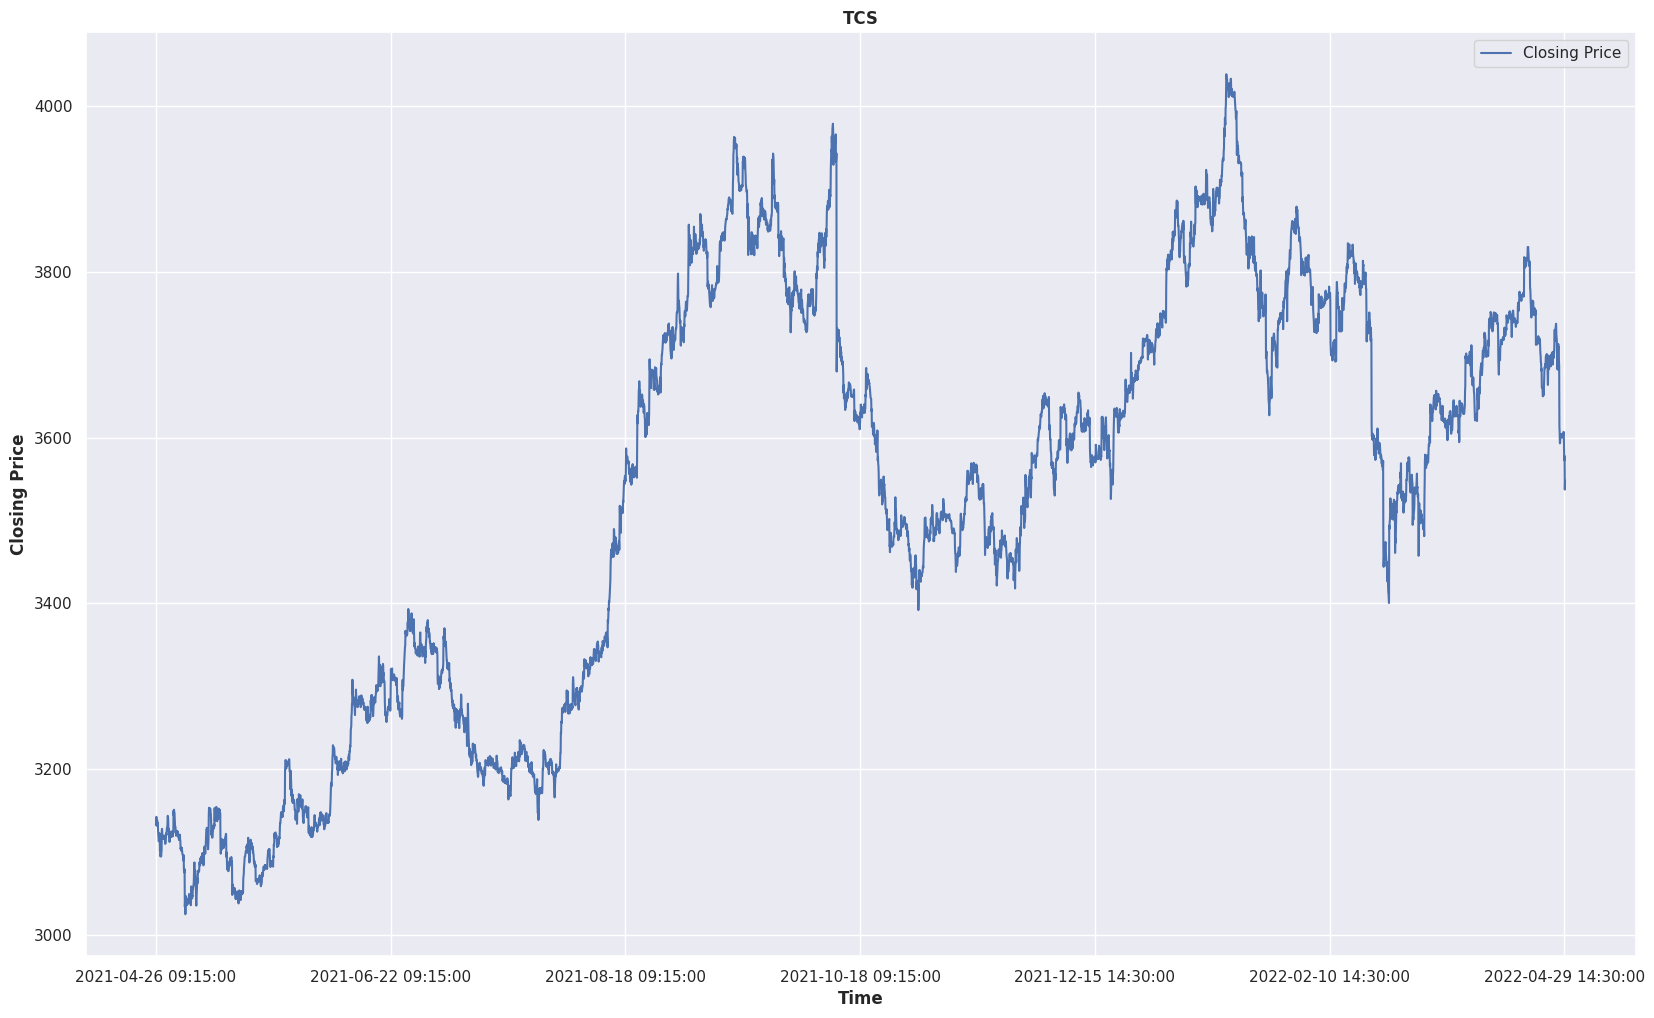

In [11]:
close_ds.plot(x='time', y='close', figsize=(20, 12))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.title("TCS", fontweight='bold')
plt.legend(['Closing Price'])

In [12]:
from time import time
from datetime import datetime

"""
  Parameters
    d - previous number of data points to use for EMA
    price - stock price list
  Returns
    list of EMA of all points starting from the dth data point
"""
def calculate_ema(d, price) :
  print(f" Days {d} \n Length of prices {len(price)}")
  # formula https://www.investopedia.com/terms/e/ema.asp
  ema = []                                    # stores the ema starting from the dth data point i.e corresponding to price[d]
  ema_yesterday = sum(price[:d])/d            # sma of first d days, this will serve as the EMA of yesterday
  multiplier = 2/(d+1)                        # multiplier
  for i in range(d,len(price)):
    ema_today = price[i]*multiplier + ema_yesterday*(1-multiplier)
    ema.append(ema_today)
    ema_yesterday = ema_today
  print(f" Length of EMA list {len(ema)}")
  return ema



"""
  Parameters
    df - original dataframe
  Returns
    list of vwap
"""

def calculate_vwap(df):

  time_format = "%Y-%m-%d %H:%M:%S"

  sum_pv = 0
  sum_volume = 0

  vwap = []

  previous_day = datetime.strptime(df["time"][0], time_format).day

  for i in range(len(df)):

    current_day = datetime.strptime(df["time"][i], time_format).day

    if(current_day!=previous_day):
      sum_pv = 0
      sum_volume = 0

    previous_day = current_day

    sum_pv += ((df["high"][i] + df["low"][i] + df["close"][i])/3) * df["volume"][i]
    sum_volume += df["volume"][i]
    vwap.append(sum_pv/sum_volume)
  return vwap

In [13]:
# price list
price = list(close_ds.drop('time', axis=1).values)
print(f"len prices = {len(price)}")

# ema taking 10 previous points for calculation
ema = calculate_ema(10,price)
print(f"len ema = {len(ema)}")

vwap = calculate_vwap(raw_data)
print(f"len vwap = {len(vwap)}")

len prices = 6004
 Days 10 
 Length of prices 6004
 Length of EMA list 5994
len ema = 5994
len vwap = 6004


In [14]:
# make all ema, vwap, prices lists of equal length
price = price[-len(ema):]
vwap = vwap[-len(ema):]

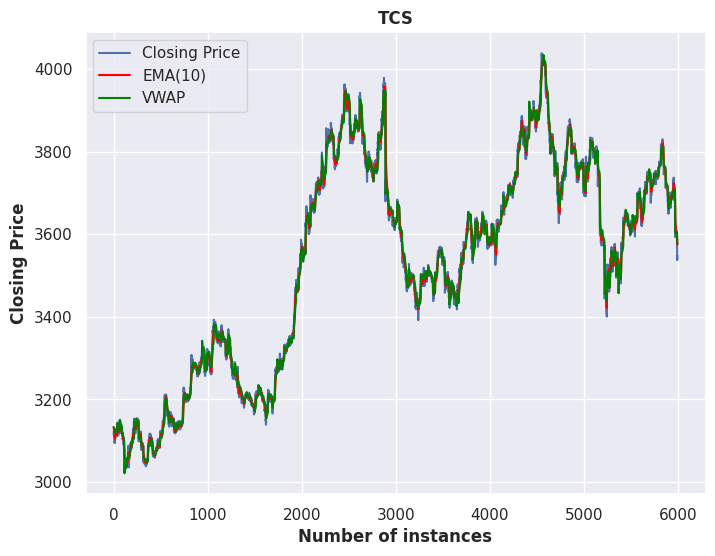

In [15]:
plt.figure(figsize=(8,6))
plt.title("TCS", fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
plt.plot(price)
plt.plot(ema, color='red')
plt.plot(vwap,color='green')
plt.legend(['Closing Price','EMA(10)','VWAP'])
plt.show()

In [16]:
# split a multivariate sequence into samples
# n_steps ---> number of lag observations

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [17]:
ema = np.array(ema).reshape(len(ema), 1)
vwap = np.array(vwap).reshape(len(vwap), 1)
price = np.array(price).reshape(len(price), 1)
dataset = np.hstack((ema, vwap, price))
print(dataset)

[[3132.79727273 3132.59926831 3121.85      ]
 [3129.92504132 3132.21740413 3117.        ]
 [3126.84776108 3131.71372947 3113.        ]
 ...
 [3591.69021457 3598.88190553 3577.9       ]
 [3581.81017556 3585.40668841 3537.35      ]
 [3575.66287091 3577.55036411 3548.        ]]


In [18]:
n_steps = 3
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
print(X[0], y[0])

(5992, 3, 3) (5992,)
[[3132.79727273 3132.59926831 3121.85      ]
 [3129.92504132 3132.21740413 3117.        ]
 [3126.84776108 3131.71372947 3113.        ]] 3113.0


In [19]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(4194, 3, 3)
(4194,)
(1798, 3, 3)
(1798,)


In [20]:
X_test

array([[[3698.35428739, 3713.88333333, 3714.3       ],
        [3702.22623514, 3714.8060238 , 3719.65      ],
        [3703.63964693, 3714.28806375, 3710.        ]],

       [[3702.22623514, 3714.8060238 , 3719.65      ],
        [3703.63964693, 3714.28806375, 3710.        ],
        [3705.58698385, 3714.10828059, 3714.35      ]],

       [[3703.63964693, 3714.28806375, 3710.        ],
        [3705.58698385, 3714.10828059, 3714.35      ],
        [3706.93480497, 3714.04608818, 3713.        ]],

       ...,

       [[3599.67797486, 3600.70574913, 3580.        ],
        [3594.7547067 , 3599.72400514, 3572.6       ],
        [3591.69021457, 3598.88190553, 3577.9       ]],

       [[3594.7547067 , 3599.72400514, 3572.6       ],
        [3591.69021457, 3598.88190553, 3577.9       ],
        [3581.81017556, 3585.40668841, 3537.35      ]],

       [[3591.69021457, 3598.88190553, 3577.9       ],
        [3581.81017556, 3585.40668841, 3537.35      ],
        [3575.66287091, 3577.55036411, 354

In [21]:
print(X_test)

[[[3698.35428739 3713.88333333 3714.3       ]
  [3702.22623514 3714.8060238  3719.65      ]
  [3703.63964693 3714.28806375 3710.        ]]

 [[3702.22623514 3714.8060238  3719.65      ]
  [3703.63964693 3714.28806375 3710.        ]
  [3705.58698385 3714.10828059 3714.35      ]]

 [[3703.63964693 3714.28806375 3710.        ]
  [3705.58698385 3714.10828059 3714.35      ]
  [3706.93480497 3714.04608818 3713.        ]]

 ...

 [[3599.67797486 3600.70574913 3580.        ]
  [3594.7547067  3599.72400514 3572.6       ]
  [3591.69021457 3598.88190553 3577.9       ]]

 [[3594.7547067  3599.72400514 3572.6       ]
  [3591.69021457 3598.88190553 3577.9       ]
  [3581.81017556 3585.40668841 3537.35      ]]

 [[3591.69021457 3598.88190553 3577.9       ]
  [3581.81017556 3585.40668841 3537.35      ]
  [3575.66287091 3577.55036411 3548.        ]]]


In [22]:
print(y_test)

[3710.   3714.35 3713.   ... 3577.9  3537.35 3548.  ]


In [23]:
# flattening input for model feeding

# n_input = X_train.shape[1] * X_train.shape[2]
# X_train_flattened = X_train.reshape((X_train.shape[0], n_input))
# X_test_flattened = X_test.reshape((X_test.shape[0], n_input))
# print(X_train_flattened.shape)
# print(X_test_flattened.shape)

In [25]:
# Model training

from tensorflow import keras
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import LSTM
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Bidirectional

# Vanilla LSTM

model_lstm_vanilla = Sequential()
model_lstm_vanilla.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_vanilla.add(Dense(1))
model_lstm_vanilla.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0003))
model_lstm_vanilla.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Stacked LSTM

model_lstm_stacked = Sequential()
model_lstm_stacked.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_stacked.add(LSTM(50, activation='relu'))
model_lstm_stacked.add(Dense(1))
model_lstm_stacked.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='mse')
model_lstm_stacked.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 3, 50)               │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Bidirectional LSTM

model_lstm_bidirectional = Sequential()
model_lstm_bidirectional.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_bidirectional.add(Dense(1))
model_lstm_bidirectional.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='mse')
model_lstm_bidirectional.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 100)                 │          21,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,701 (84.77 KB)

 Trainable params: 21,701 (84.77 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
lstm_vanilla_history = model_lstm_vanilla.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
132/132 - 5s - 41ms/step - loss: 8500282.0000 - val_loss: 6669100.5000
Epoch 2/50
132/132 - 2s - 16ms/step - loss: 3796814.0000 - val_loss: 2461473.5000
Epoch 3/50
132/132 - 1s - 4ms/step - loss: 762485.8750 - val_loss: 33060.8750
Epoch 4/50
132/132 - 0s - 3ms/step - loss: 3906.6978 - val_loss: 223.2761
Epoch 5/50
132/132 - 1s - 4ms/step - loss: 158.5869 - val_loss: 223.0946
Epoch 6/50
132/132 - 0s - 3ms/step - loss: 156.8421 - val_loss: 222.7678
Epoch 7/50
132/132 - 0s - 3ms/step - loss: 157.9133 - val_loss: 223.3030
Epoch 8/50
132/132 - 1s - 4ms/step - loss: 157.6793 - val_loss: 222.4327
Epoch 9/50
132/132 - 1s - 5ms/step - loss: 158.2033 - val_loss: 222.6092
Epoch 10/50
132/132 - 1s - 4ms/step - loss: 163.0895 - val_loss: 222.5370
Epoch 11/50
132/132 - 1s - 6ms/step - loss: 160.8305 - val_loss: 221.8206
Epoch 12/50
132/132 - 1s - 5ms/step - loss: 159.9804 - val_loss: 222.6584
Epoch 13/50
132/132 - 1s - 4ms/step - loss: 159.0491 - val_loss: 221.6760
Epoch 14/50
132/132 - 1

In [29]:
lstm_stacked_history = model_lstm_stacked.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
132/132 - 7s - 51ms/step - loss: 10988341.0000 - val_loss: 11239675.0000
Epoch 2/50
132/132 - 0s - 4ms/step - loss: 7188219.5000 - val_loss: 4727613.0000
Epoch 3/50
132/132 - 0s - 3ms/step - loss: 1509062.8750 - val_loss: 53563.6406
Epoch 4/50
132/132 - 1s - 5ms/step - loss: 3016.0737 - val_loss: 191.4943
Epoch 5/50
132/132 - 1s - 5ms/step - loss: 130.0276 - val_loss: 191.1155
Epoch 6/50
132/132 - 1s - 4ms/step - loss: 130.0065 - val_loss: 190.3708
Epoch 7/50
132/132 - 1s - 4ms/step - loss: 130.2383 - val_loss: 190.5895
Epoch 8/50
132/132 - 1s - 4ms/step - loss: 130.0488 - val_loss: 191.3474
Epoch 9/50
132/132 - 1s - 4ms/step - loss: 130.0983 - val_loss: 190.6877
Epoch 10/50
132/132 - 1s - 5ms/step - loss: 129.9590 - val_loss: 190.8756
Epoch 11/50
132/132 - 1s - 5ms/step - loss: 130.1270 - val_loss: 191.5206
Epoch 12/50
132/132 - 1s - 5ms/step - loss: 130.2748 - val_loss: 192.9370
Epoch 13/50
132/132 - 1s - 5ms/step - loss: 130.2045 - val_loss: 190.4456
Epoch 14/50
132/132 -

In [30]:
lstm_bidirectional_history = model_lstm_bidirectional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
132/132 - 11s - 83ms/step - loss: 9013871.0000 - val_loss: 4299202.0000
Epoch 2/50
132/132 - 1s - 4ms/step - loss: 1024084.0000 - val_loss: 9281.3857
Epoch 3/50
132/132 - 1s - 4ms/step - loss: 728.3737 - val_loss: 108.6359
Epoch 4/50
132/132 - 0s - 4ms/step - loss: 75.7433 - val_loss: 107.1946
Epoch 5/50
132/132 - 1s - 5ms/step - loss: 74.7960 - val_loss: 106.3515
Epoch 6/50
132/132 - 1s - 4ms/step - loss: 74.2458 - val_loss: 106.1706
Epoch 7/50
132/132 - 1s - 5ms/step - loss: 73.7787 - val_loss: 105.9521
Epoch 8/50
132/132 - 0s - 3ms/step - loss: 73.5323 - val_loss: 105.4646
Epoch 9/50
132/132 - 1s - 4ms/step - loss: 73.3441 - val_loss: 105.3126
Epoch 10/50
132/132 - 1s - 5ms/step - loss: 73.1515 - val_loss: 105.2797
Epoch 11/50
132/132 - 1s - 4ms/step - loss: 73.1688 - val_loss: 105.4761
Epoch 12/50
132/132 - 1s - 5ms/step - loss: 73.0217 - val_loss: 105.1094
Epoch 13/50
132/132 - 1s - 4ms/step - loss: 73.2496 - val_loss: 105.2281
Epoch 14/50
132/132 - 1s - 5ms/step - loss

Text(0, 0.5, 'MSE')

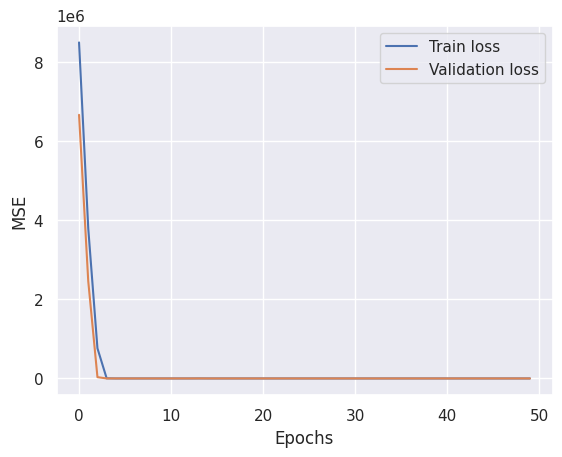

In [31]:
# plots
fig = plt.figure()
plt.plot(lstm_vanilla_history.history['loss'], label='Train loss')
plt.plot(lstm_vanilla_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

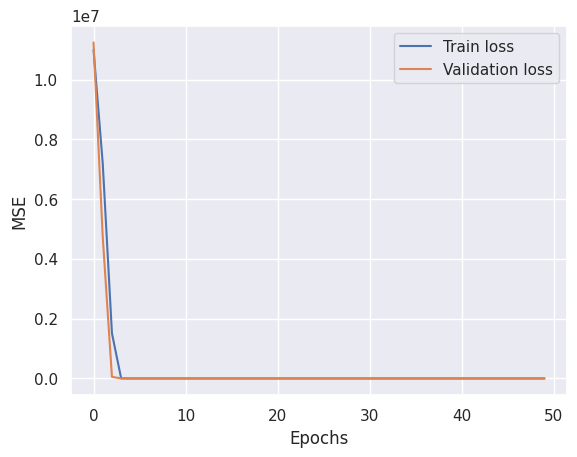

In [32]:
# plots
fig = plt.figure()
plt.plot(lstm_stacked_history.history['loss'], label='Train loss')
plt.plot(lstm_stacked_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

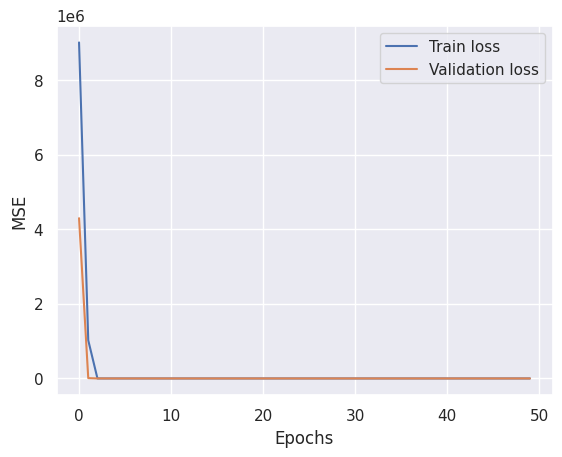

In [33]:
# plots
fig = plt.figure()
plt.plot(lstm_bidirectional_history.history['loss'], label='Train loss')
plt.plot(lstm_bidirectional_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [34]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
lstm_vanilla_train_pred = model_lstm_vanilla.predict(X_train)
lstm_vanilla_test_pred = model_lstm_vanilla.predict(X_test)
print('Train rmse for vanilla:', np.sqrt(mean_squared_error(y_train, lstm_vanilla_train_pred)))
print('Test rmse for vanilla:', np.sqrt(mean_squared_error(y_test, lstm_vanilla_test_pred)))


lstm_stacked_train_pred = model_lstm_stacked.predict(X_train)
lstm_stacked_test_pred = model_lstm_stacked.predict(X_test)
print('Train rmse for stacked:', np.sqrt(mean_squared_error(y_train, lstm_stacked_train_pred)))
print('Test rmse for stacked:', np.sqrt(mean_squared_error(y_test, lstm_stacked_test_pred)))


lstm_bidirectional_train_pred = model_lstm_bidirectional.predict(X_train)
lstm_bidirectional_test_pred = model_lstm_bidirectional.predict(X_test)
print('Train rmse for bidirectional:', np.sqrt(mean_squared_error(y_train, lstm_bidirectional_train_pred)))
print('Test rmse for bidirectional:', np.sqrt(mean_squared_error(y_test, lstm_bidirectional_test_pred)))

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Train rmse for vanilla: 12.896861524266988
Test rmse for vanilla: 14.924409422094902
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Train rmse for stacked: 11.422580019174069
Test rmse for stacked: 13.761921084055754
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Train rmse for bidirectional: 10.318024118583226
Test rmse for bidirectional: 11.011560867744253


In [35]:
print(y_test[0:10])
print(lstm_vanilla_test_pred[0:10])

[3710.   3714.35 3713.   3713.85 3710.5  3717.05 3719.   3718.55 3718.85
 3716.9 ]
[[3705.9736]
 [3707.0684]
 [3706.9072]
 [3707.9055]
 [3708.1025]
 [3708.6199]
 [3709.3774]
 [3710.9324]
 [3711.8071]
 [3712.193 ]]


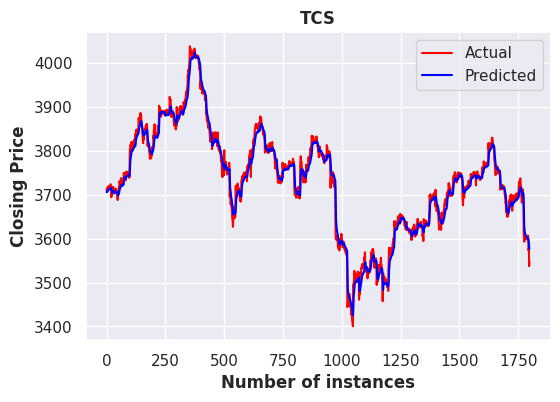

In [37]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("TCS", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_vanilla_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

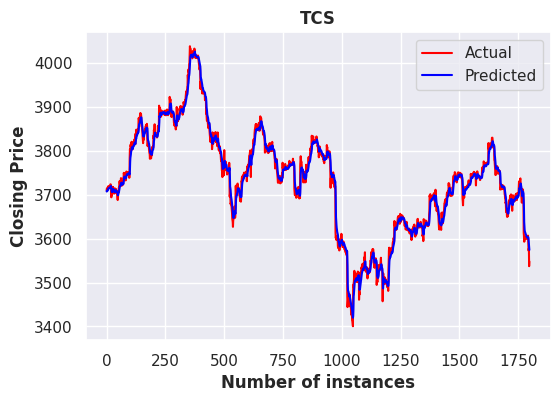

In [38]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("TCS", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_stacked_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

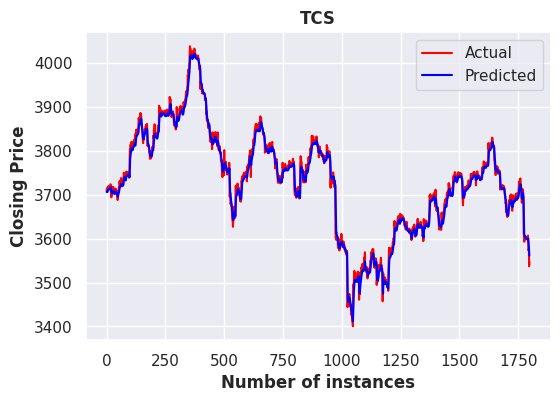

In [39]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("TCS", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_bidirectional_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])